In [ ]:
# # 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/secom_nona_train1.csv
!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/secom_nona_test1.csv

# Machine_Learning4_automl

In [ ]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
install_and_import(['tpot', 'pycaret', 'h2o'])


tpot is already installed.
pycaret is already installed.
h2o is already installed.


In [ ]:
## 필요 모듈 임포트
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# AutoML


## 데이터 읽기

In [ ]:
train = pd.read_csv('secom_nona_train1.csv')
test = pd.read_csv('secom_nona_test1.csv')

In [ ]:
train['target'].value_counts() # 불균형이 큼

,count
target,
0,1243
1,88


## 데이터 전처리

In [ ]:
## 시간 포맷 변경
train['datetime'] = pd.to_datetime(train['datetime'], format = "%d/%m/%Y %H:%M:%S")
test['datetime'] = pd.to_datetime( test['datetime'], format = "%d/%m/%Y %H:%M:%S")

## 시간 정보 따로 저장
train_time = train['datetime']
test_time = test['datetime']

## train/test 분리
X_train = train.drop(['datetime',  'target'], axis=1)
y_train = train['target']

X_test = test.drop(['datetime', 'target'], axis=1)
y_test = test['target']

## h2o

### h2o 설치

In [ ]:
# !pip install h2o # 조금 걸림..

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.5-py2.py3-none-any.whl size=265646558 sha256=396e6229988d7e8695fa61e4122cdbadfde354f4d4415ccc6e6d4ae822d280a6
  Stored in directory: /root/.cache/pip/wheels/1a/46/4f/9b366522399306d7849672d58aefb44c9b73378d710bde2853
Successfully built h2o


In [ ]:
## H2O 환경설정
import h2o
from h2o.automl import H2OAutoML

## H2O 환경 초기화
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp18q2fksw
  JVM stdout: /tmp/tmp18q2fksw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp18q2fksw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_t885vx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### 데이터프레임 변환

In [ ]:
## Pandas DataFrame을 H2O 프레임으로 변환
h2o_train = h2o.H2OFrame(pd.concat([X_train, y_train], axis = 1))
h2o_test = h2o.H2OFrame(pd.concat([X_test, y_test], axis = 1))


## 종속변수 범주형 설정
h2o_train['target'] = h2o_train['target'].asfactor()
h2o_test['target'] = h2o_test['target'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2o_train

x_0      x_1      x_2      x_3     x_4    x_5       x_6     x_7     x_8      x_9     x_10    x_11     x_12    x_13     x_14     x_15     x_16    x_17     x_18     x_19    x_20      x_21     x_22      x_23      x_24    x_25    x_26    x_27     x_28    x_29    x_30    x_31     x_32    x_33     x_34     x_35     x_36     x_37     x_38     x_39    x_40    x_41    x_42     x_43     x_44     x_45     x_46    x_47     x_48    x_49     x_50      x_51    x_52    x_53    x_54    x_55    x_56    x_57    x_58     x_59     x_60     x_61      x_62     x_63     x_64      x_65     x_66      x_67     x_68    x_69     x_70      x_71     x_72     x_73    x_74     x_75     x_76     x_77     x_78     x_79     x_80     x_81     x_82    x_83    x_84     x_85    x_86    x_87     x_88    x_89     x_90     x_91     x_92     x_93     x_94    x_95     x_96    x_97     x_98     x_99    x_100    x_101    x_102    x_103    x_104    x_105    x_106    x_107    x_108    x_109    x_110    x_111    x_112    x_113    x_114    x_115    x_116    x_117    x_118    x_119    x_120    x_121    x_122    x_123    x_124    x_125    x_126    x_127    x_128    x_129    x_130    x_131    x_132     x_133    x_134    x_135    x_136    x_137    x_138    x_139    x_140    x_141    x_142    x_143    x_144    x_145    x_146    x_147    x_148    x_149    x_150    x_151    x_152    x_153    x_154    x_155    x_156    x_157    x_158    x_159    x_160    x_161    x_162    x_163    x_164    x_165    x_166    x_167    x_168    x_169    x_170    x_171    x_172    x_173    x_174    x_175    x_176    x_177    x_178    x_179    x_180    x_181    x_182    x_183    x_184    x_185    x_186    x_187    x_188    x_189    x_190    x_191    x_192    x_193    x_194    x_195    x_196    x_197    x_198    x_199    x_200    x_201    x_202    x_203      x_204    x_205    x_206    x_207    x_208    x_209    x_210    x_211    x_212    x_213    x_214    x_215    x_216    x_217    x_218    x_219    x_220    x_221    x_222     x_223    x_224    x_225    x_226    x_227    x_228    x_229    x_230    x_231    x_232    x_233    x_234    x_235    x_236    x_237    x_238    x_239    x_240    x_241    x_242    x_243    x_244    x_245    x_246    x_247    x_248    x_249     x_250    x_251    x_252    x_253    x_254    x_255    x_256    x_257    x_258    x_259    x_260    x_261    x_262    x_263    x_264    x_265    x_266    x_267    x_268    x_269    x_270    x_271    x_272    x_273     x_274    x_275    x_276    x_277    x_278    x_279    x_280    x_281    x_282    x_283    x_284    x_285     x_286    x_287    x_288    x_289    x_290    x_291    x_292    x_293     x_294     x_295     x_296      x_297    x_298    x_299    x_300    x_301    x_302    x_303    x_304    x_305    x_306    x_307    x_308    x_309    x_310    x_311    x_312    x_313    x_314    x_315    x_316    x_317    x_318    x_319    x_320    x_321    x_322    x_323    x_324    x_325    x_326    x_327    x_328    x_329    x_330    x_331    x_332    x_333    x_334    x_335    x_336    x_337     x_338     x_339      x_340    x_341    x_342    x_343    x_344     x_345      x_346    x_347    x_348    x_349    x_350    x_351    x_352    x_353    x_354    x_355    x_356    x_357    x_358    x_359    x_360    x_361    x_362    x_363    x_364    x_365    x_366    x_367    x_368    x_369    x_370    x_371    x_372    x_373    x_374    x_375    x_376    x_377    x_378    x_379    x_380    x_381    x_382    x_383    x_384    x_385    x_386    x_387    x_388    x_389    x_390    x_391    x_392    x_393    x_394    x_395    x_396    x_397    x_398    x_399    x_400    x_401    x_402    x_403    x_404    x_405    x_406    x_407    x_408    x_409    x_410    x_411    x_412    x_413    x_414    x_415    x_416    x_417    x_418    x_419    x_420    x_421    x_422     x_423     x_424    x_425    x_426    x_427    x_428    x_429    x_430    x_431     x_432     x_433    x_434    x_435    x_436    x_437    x_438     x_439    x_440    x_441    x_442    x_443    x_444    x

In [ ]:
 ## H2O 프레임 컬럼 설정
target = 'target'  # y_train의 컬럼 이름
features = X_train.columns.tolist()  # X_train의 모든 컬럼 이름 리스트
features

['x_0',
 'x_1',
 'x_2',
 'x_3',
 'x_4',
 'x_5',
 'x_6',
 'x_7',
 'x_8',
 'x_9',
 'x_10',
 'x_11',
 'x_12',
 'x_13',
 'x_14',
 'x_15',
 'x_16',
 'x_17',
 'x_18',
 'x_19',
 'x_20',
 'x_21',
 'x_22',
 'x_23',
 'x_24',
 'x_25',
 'x_26',
 'x_27',
 'x_28',
 'x_29',
 'x_30',
 'x_31',
 'x_32',
 'x_33',
 'x_34',
 'x_35',
 'x_36',
 'x_37',
 'x_38',
 'x_39',
 'x_40',
 'x_41',
 'x_42',
 'x_43',
 'x_44',
 'x_45',
 'x_46',
 'x_47',
 'x_48',
 'x_49',
 'x_50',
 'x_51',
 'x_52',
 'x_53',
 'x_54',
 'x_55',
 'x_56',
 'x_57',
 'x_58',
 'x_59',
 'x_60',
 'x_61',
 'x_62',
 'x_63',
 'x_64',
 'x_65',
 'x_66',
 'x_67',
 'x_68',
 'x_69',
 'x_70',
 'x_71',
 'x_72',
 'x_73',
 'x_74',
 'x_75',
 'x_76',
 'x_77',
 'x_78',
 'x_79',
 'x_80',
 'x_81',
 'x_82',
 'x_83',
 'x_84',
 'x_85',
 'x_86',
 'x_87',
 'x_88',
 'x_89',
 'x_90',
 'x_91',
 'x_92',
 'x_93',
 'x_94',
 'x_95',
 'x_96',
 'x_97',
 'x_98',
 'x_99',
 'x_100',
 'x_101',
 'x_102',
 'x_103',
 'x_104',
 'x_105',
 'x_106',
 'x_107',
 'x_108',
 'x_109',
 'x_110',


### AutoML 모델 초기화 및 학습 설정
- https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#automl-interface
- 너무 다양..

In [ ]:
## AutoML 모델 초기화 및 학습 설정
aml = H2OAutoML(
                              max_models = 3,                      # 최대 생성할 모델 수
                              max_runtime_secs = 300,    # 전체 탐색 시간(초) , 이를 통해 하이퍼파라 탐색 경우의 수 조절 가능
                              seed = 1234,                                # 랜덤 시드 설정
                              nfolds = 3,                                    # 교차 검증을 위한 폴드 수 (기본값은 5)
                              stopping_metric = "AUC",     # 조기 중단을 위한 기준 (AUC, MSE 등)
                              balance_classes = False,       # 클래스 불균형이 있는 경우는 False 설정, 없으면 True(기본값)
                             #  include_algos=["GBM", "XGBoost", "GLM"]  # 사용할 알고리즘 지정
                          )

In [ ]:
## 학습 ## 오래걸림..........
aml.train(x = features, # 독립변수 이름
                    y = target, # 종속변수 이름
                    training_frame = h2o_train # 학습할 데이터
          )

AutoML progress: |
08:30:54.15: _train param, Dropping bad and constant columns: [x_193, x_194, x_191, x_192, x_190, x_236, x_512, x_237, x_234, x_235, x_232, x_233, x_230, x_231, x_515, x_514, x_513, x_481, x_240, x_401, x_369, x_402, x_400, x_243, x_364, x_241, x_5, x_242, x_529, x_528, x_403, x_404, x_179, x_178, x_450, x_330, x_451, x_458, x_501, x_226, x_465, x_466, x_463, x_189, x_464, x_186, x_461, x_462, x_509, x_508, x_97, x_507, x_506, x_229, x_505, x_504, x_503, x_502, x_13, x_394, x_313, x_314, x_399, x_276, x_397, x_398, x_395, x_396, x_42, x_315, x_49, x_284, x_325, x_322, x_328, x_449, x_329, x_326, x_327, x_371, x_372, x_370, x_258, x_379, x_534, x_259, x_533, x_256, x_498, x_532, x_257, x_378, x_531, x_375, x_530, x_373, x_374, x_538, x_537, x_414, x_536, x_535, x_69, x_261, x_141, x_262, x_380, x_260, x_381, x_149, x_422, x_265, x_266, x_263, x_264, x_52]

████
08:31:08.228: _train param, Dropping bad and constant columns: [x_193, x_194, x_191, x_192, x_190, x_236, x_

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240919_83053


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    35                 35                          5753                   4            9            6.08571       7             10            8.4

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.03525042602310761
RMSE: 0.18775096810165215
LogLoss: 0.12765418589707048
Mean Per-Class Error: 0.10307723250201127
AUC: 0.9953786659840561
AUCPR: 0.946821658024678
Gini: 0.9907573319681122

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2241298196094941
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1241  2    0.0016   (2.0/1243.0)
1      18    70   0.2045   (18.0/88.0)
Total  1259  72   0.015    (20.0/1331.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.22413      0.875     68
max f2                       0.127135     0.894309  121
max f0point5                 0.22413      0.930851  68
max accuracy                 0.22413      0.984974  68
max precision                0.585697     1         0
max recall                   0.127135     1         121
max specificity              0.585697     1         0
max absolute_mcc             0.22413      0.872035  68
max min_per_class_accuracy   0.135705     0.964602  114
max mean_per_class_accuracy  0.127135     0.979083  121
max tns                      0.585697     1243      0
max fns                      0.585697     87        0
max fps                      0.00772125   1243      399
max tps                      0.127135     88        121
max tnr                      0.585697     1         0
max fnr                      0.585697     0.988636  0
max fpr                      0.00772125   1         399
max tpr                      0.127135     1         121

Gains/Lift Table: Avg response rate:  6.61 %, avg score:  6.57 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0105184                   0.430321           15.125    15.125             1                0.495147   1                           0.495147            0.159091        0.159091                   1412.5    1412.5             0.159091
2        0.0202855                   0.381093           15.125    15.125             1                0.402443   1                           0.450512            0.147727        0.306818                   1412.5    1412.5             0.306818
3        0.0300526                   0.307344           15.125    15.125             1                0.345777   1                           0.416473            0.147727        0.454545                   1412.5    1412.5             0.454545
4        0.040571                    0.273948           14.0446   14.8449            0.928571         0.288263   0.981481                    0.383233            0.147727        0.602273                   1304.46   1384.49            0.601468
5        0.0503381                   0.245812           15.125    14.8993            1                0.260989   0.985075                    0.359514            0.147727

-  Gains/Lift Table
  -  모델의 성능을 평가하는 데 사용되며, 특히 분류 문제에서 모델이 얼마나 잘 예측하는지를 보여줌
  - 상위 그룹에서 높은 Lift와 Response Rate를 보이는 모델이 좋은 모델임
  - 각 그룹(퍼센타일 구간)에서 모델의 성능을 세밀하게 분석할 수 있음
  - 모델이 특정 구간에서 양성 데이터를 얼마나 잘 예측하는지 분석할 수 있음
  - 세부 내용
    - group: 데이터를 예측 점수에 따라 나눈 그룹. 상위 1% 그룹부터 하위까지 순차적으로 구분
    - cumulative_data_fraction: 각 그룹이 누적된 데이터의 비율을 나타냄. ex: 상위 1%
    - lower_threshold: 각 그룹에서 포함된 데이터의 최소 예측 점수. 이 점수보다 높은 데이터가 그 그룹에 속함
    - lift: 해당 그룹에서 모델이 얼마나 잘 예측했는지 보여주는 지표. 랜덤 추측에 비해 몇 배 더 나은 성능인지 나타냄
    - response_rate: 해당 그룹에서 실제 양성(긍정적) 반응 비율. ex) 상위 1%의 데이터에서 73.3%가 양성 클래스일 때 0.733으로 나타남
    - score: 모델이 해당 그룹에서 예측한 평균 점수
    - capture_rate: 전체 양성 데이터 중에서 해당 그룹이 차지하는 비율 예를들어 그룹 1이 전체 양성 데이터의 3%를 포함하면 0.03으로 나타남
    - gain: 모델이 양성 데이터를 찾아내는 성과를 랜덤 모델과 비교한 값
    - kolmogorov_smirnov (KS): 모델이 양성과 음성을 얼마나 잘 구분하는지 나타내는 지표. 값이 클수록 잘 구분하는 모델


### 학습결과(리더보드)

In [ ]:
## 리더보드 출력: 가장 성능이 좋은 모델 확인
leaderboard = aml.leaderboard
leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20240919_83053,0.685274,0.233509,0.111294,0.409745,0.247574,0.061293
StackedEnsemble_BestOfFamily_1_AutoML_1_20240919_83053,0.680415,0.233699,0.107365,0.343473,0.246879,0.0609492
XGBoost_1_AutoML_1_20240919_83053,0.621119,0.255781,0.088645,0.397275,0.254537,0.0647891
GLM_1_AutoML_1_20240919_83053,0.619784,0.264363,0.100574,0.42498,0.24921,0.0621058


### 예측 결과

In [ ]:
## 가장 성능이 좋은 모델(리더) 가져오기
best_model_aml = aml.leader
best_model_aml # 그나마 클래스 불균형을 고려한 지표는.... AUC, "AUCPrecision-Recall" (positive class 예측에 초점)

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240919_83053


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    35                 35                          5753                   4            9            6.08571       7             10            8.4

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.03525042602310761
RMSE: 0.18775096810165215
LogLoss: 0.12765418589707048
Mean Per-Class Error: 0.10307723250201127
AUC: 0.9953786659840561
AUCPR: 0.946821658024678
Gini: 0.9907573319681122

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2241298196094941
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1241  2    0.0016   (2.0/1243.0)
1      18    70   0.2045   (18.0/88.0)
Total  1259  72   0.015    (20.0/1331.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.22413      0.875     68
max f2                       0.127135     0.894309  121
max f0point5                 0.22413      0.930851  68
max accuracy                 0.22413      0.984974  68
max precision                0.585697     1         0
max recall                   0.127135     1         121
max specificity              0.585697     1         0
max absolute_mcc             0.22413      0.872035  68
max min_per_class_accuracy   0.135705     0.964602  114
max mean_per_class_accuracy  0.127135     0.979083  121
max tns                      0.585697     1243      0
max fns                      0.585697     87        0
max fps                      0.00772125   1243      399
max tps                      0.127135     88        121
max tnr                      0.585697     1         0
max fnr                      0.585697     0.988636  0
max fpr                      0.00772125   1         399
max tpr                      0.127135     1         121

Gains/Lift Table: Avg response rate:  6.61 %, avg score:  6.57 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0105184                   0.430321           15.125    15.125             1                0.495147   1                           0.495147            0.159091        0.159091                   1412.5    1412.5             0.159091
2        0.0202855                   0.381093           15.125    15.125             1                0.402443   1                           0.450512            0.147727        0.306818                   1412.5    1412.5             0.306818
3        0.0300526                   0.307344           15.125    15.125             1                0.345777   1                           0.416473            0.147727        0.454545                   1412.5    1412.5             0.454545
4        0.040571                    0.273948           14.0446   14.8449            0.928571         0.288263   0.981481                    0.383233            0.147727        0.602273                   1304.46   1384.49            0.601468
5        0.0503381                   0.245812           15.125    14.8993            1                0.260989   0.985075                    0.359514            0.147727

In [ ]:
## 모델을 저장후 이름 지정
# model_path = h2o.save_model(model=best_model, path="모델저장경로", force=True)

In [ ]:
h2o.ls()

In [ ]:
## 특정 모델 가져오기
model_id = 'GBM_1_AutoML_1_20240919_83053'
sel_model = h2o.get_model(model_id)
sel_model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240919_83053


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    35                 35                          5753                   4            9            6.08571       7             10            8.4

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.03525042602310761
RMSE: 0.18775096810165215
LogLoss: 0.12765418589707048
Mean Per-Class Error: 0.10307723250201127
AUC: 0.9953786659840561
AUCPR: 0.946821658024678
Gini: 0.9907573319681122

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2241298196094941
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1241  2    0.0016   (2.0/1243.0)
1      18    70   0.2045   (18.0/88.0)
Total  1259  72   0.015    (20.0/1331.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.22413      0.875     68
max f2                       0.127135     0.894309  121
max f0point5                 0.22413      0.930851  68
max accuracy                 0.22413      0.984974  68
max precision                0.585697     1         0
max recall                   0.127135     1         121
max specificity              0.585697     1         0
max absolute_mcc             0.22413      0.872035  68
max min_per_class_accuracy   0.135705     0.964602  114
max mean_per_class_accuracy  0.127135     0.979083  121
max tns                      0.585697     1243      0
max fns                      0.585697     87        0
max fps                      0.00772125   1243      399
max tps                      0.127135     88        121
max tnr                      0.585697     1         0
max fnr                      0.585697     0.988636  0
max fpr                      0.00772125   1         399
max tpr                      0.127135     1         121

Gains/Lift Table: Avg response rate:  6.61 %, avg score:  6.57 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0105184                   0.430321           15.125    15.125             1                0.495147   1                           0.495147            0.159091        0.159091                   1412.5    1412.5             0.159091
2        0.0202855                   0.381093           15.125    15.125             1                0.402443   1                           0.450512            0.147727        0.306818                   1412.5    1412.5             0.306818
3        0.0300526                   0.307344           15.125    15.125             1                0.345777   1                           0.416473            0.147727        0.454545                   1412.5    1412.5             0.454545
4        0.040571                    0.273948           14.0446   14.8449            0.928571         0.288263   0.981481                    0.383233            0.147727        0.602273                   1304.46   1384.49            0.601468
5        0.0503381                   0.245812           15.125    14.8993            1                0.260989   0.985075                    0.359514            0.147727

In [ ]:
## 모델 예측 수행
## 테스트 데이터셋에 대한 예측
pred_aml = sel_model.predict(h2o_test)
pred_aml

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.959602,0.0403977
0,0.942552,0.0574481
0,0.981226,0.0187742
0,0.954818,0.0451825
0,0.989993,0.0100072
0,0.971175,0.0288254
0,0.943441,0.0565594
0,0.979159,0.0208408
0,0.990652,0.00934753
0,0.952546,0.0474537


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def custom_confusion_matrix(y_true, y_pred):

        ## 혼동 행렬 계산
        cm = confusion_matrix(y_true=y_true,
                                                          y_pred=y_pred)
        ## 클래스 1을 기준으로 행과 열 순서 변경
        cm = cm[::-1, ::-1]

        ## 행과 열을 바꾸기 위해 전치(transpose)
        cm_transposed = cm.T
        print(cm_transposed)


        # DataFrame으로 변환 (라벨 추가)
        df_cm = pd.DataFrame(cm_transposed,
                                                      index = ['pred 1', 'pred 0'],
                                                      columns = ['act 1', 'act 0'])

        ## 히트맵 그리기
        plt.figure(figsize = (4,3))
        sns.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'Blues')
        plt.title('Confusion Matrix (Class 1 as Positive)')
        plt.ylabel('Predicted')
        plt.xlabel('Actual')
        plt.show()

In [ ]:
pred_array_aml = pred_aml['predict'].as_data_frame().values.flatten()
pred_array_aml

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

[[  3   1]
 [ 13 219]]


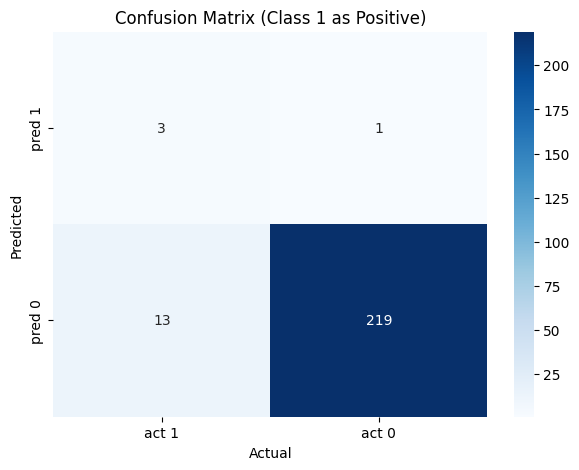

None


,0,1,accuracy,macro avg,weighted avg
precision,0.943966,0.7500,0.940678,0.846983,0.930815
recall,0.995455,0.1875,0.940678,0.591477,0.940678
f1-score,0.969027,0.3000,0.940678,0.634513,0.923669
support,220.000000,16.0000,0.940678,236.000000,236.000000


In [ ]:
## 최종 혼동 행렬 및 분류 보고서 출력
print(custom_confusion_matrix(y_test, pred_array_aml))

report = classification_report(y_test, pred_array_aml, digits = 4,  output_dict=True)
pd.DataFrame(report)

In [ ]:
# EOS

# 참고

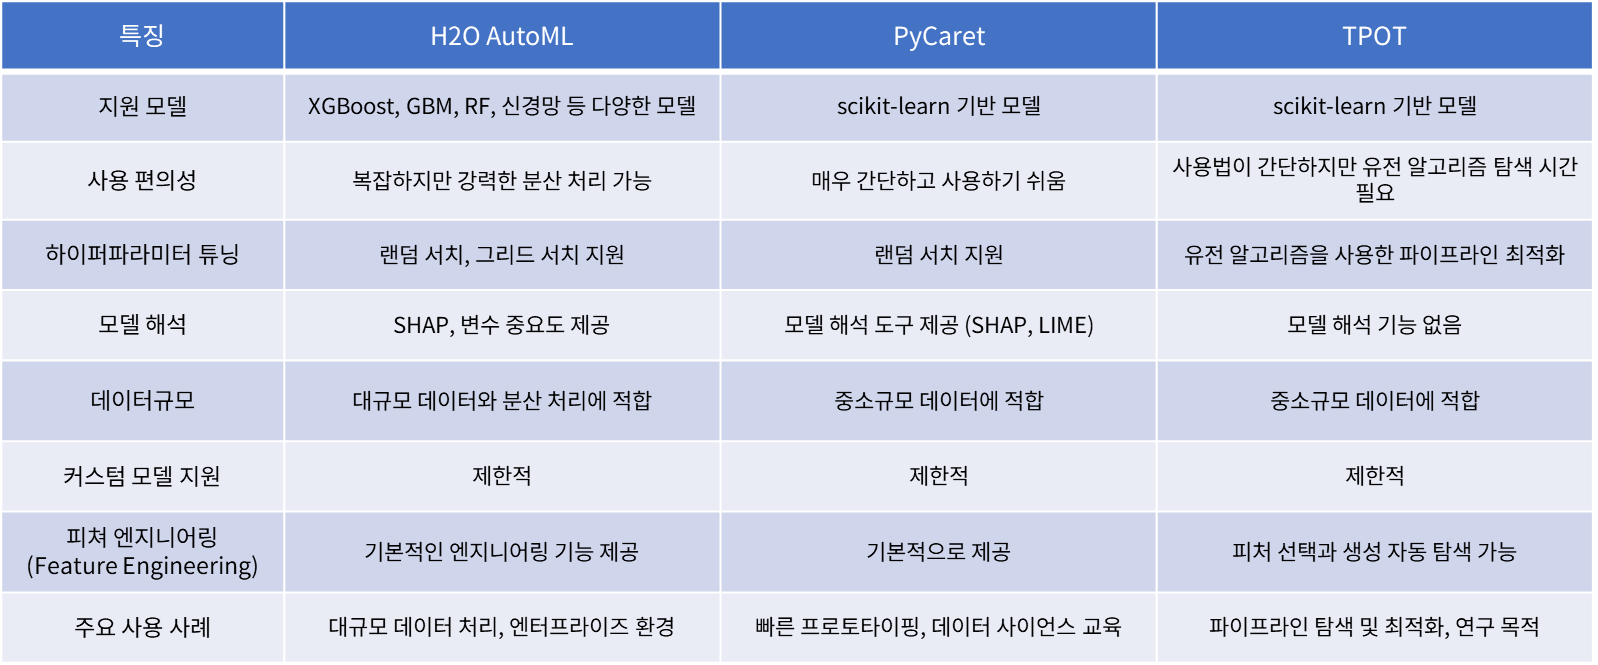

## PyCaret

In [ ]:
X_train['target'] = y_train
train = X_train
X_test['target'] = y_test
test = X_test

### pycaret

In [ ]:
## pycaret설치
!pip install pycaret
!pip install scipy==1.9.3 # pycaret 버전 호환 문제로 임시로 다운 그레이드 필수....

In [ ]:
from pycaret.classification import *

## PyCaret 환경 설정
clf1  =  setup(
                        data = train,                  # 분석에 사용할 데이터셋 (pandas DataFrame 형식)
                        target =  'target',   # 종속 변수(레이블)의 열 이름
                        train_size =  0.7,           # 훈련 데이터셋의 비율 (기본값: 0.7)
                        fold =  3,                   # 교차 검증의 폴드 수 (기본값: 10)
                        # session_id=  123,           #  시드값
                        # remove_outliers=   True,     # 이상치(outlier)를 제거할지 여부 (기본값: False)
                        # normalize =  True,           # 데이터 정규화(normalization) 여부 (기본값: False)
                        # transformation =  True,      # 데이터 변환(transform) 여부 (기본값: False), 회귀에서 box-cox 사용하는 것과  유사
                        # feature_selection =  True,   # 피처 선택(feature selection) 여부 (기본값: False), 알아서 중요변수 선택
                        # fix_imbalance =  True,       # 데이터 불균형 수정 여부 (기본값: False), True이면 알아서 언더/오버샘플링 수행..
               )


,Description,Value
0,Session id,6955
1,Target,target
2,Target type,Binary
3,Original data shape,"(1331, 591)"
4,Transformed data shape,"(1331, 591)"
5,Transformed train set shape,"(931, 591)"
6,Transformed test set shape,"(400, 591)"
7,Numeric features,590
8,Preprocess,True
9,Imputation type,simple


### 여러모델 비교

In [ ]:
## 여러 모델 비교
best_model  =  compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9334,0.5398,0.0000,0.0000,0.0000,0.0000,0.0000,0.4800
rf,Random Forest Classifier,0.9334,0.6618,0.0000,0.0000,0.0000,0.0000,0.0000,1.1533
et,Extra Trees Classifier,0.9334,0.6551,0.0000,0.0000,0.0000,0.0000,0.0000,0.4567
dummy,Dummy Classifier,0.9334,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1600
lightgbm,Light Gradient Boosting Machine,0.9323,0.7298,0.0000,0.0000,0.0000,-0.0021,-0.0050,8.5367
svm,SVM - Linear Kernel,0.9313,0.5196,0.0000,0.0000,0.0000,-0.0040,-0.0071,0.1933
xgboost,Extreme Gradient Boosting,0.9313,0.6840,0.0000,0.0000,0.0000,-0.0041,-0.0101,1.9100
qda,Quadratic Discriminant Analysis,0.9194,0.5474,0.0159,0.0333,0.0215,-0.0022,-0.0074,0.4067
ada,Ada Boost Classifier,0.9141,0.6281,0.0643,0.1553,0.0905,0.0536,0.0596,3.4333
ridge,Ridge Classifier,0.9130,0.6741,0.0960,0.1884,0.1247,0.0852,0.0912,0.2400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
## 선택한 모델의 하이퍼파라미터 튜닝
tuned_model = tune_model(
                                                        best_model,
                                                        n_iter =  30,                                         # 탐색 반복 수 증가
                                                        search_library = 'scikit-learn',     #  'scikit-learn',   # scikit-learn의 RandomizedSearchCV 사용
                                                        search_algorithm =  'random',    # 랜덤 검색 사용
                                                        optimize =  'Accuracy',                     # 최적화할 평가지표 설정
                                                        choose_better =  True                     # 성능이 더 나은 모델 선택
                                                )


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9325,0.6243,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9355,0.4964,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9323,0.4463,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9334,0.5223,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0015,0.0750,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 30 candidates, totalling 90 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
## 최적화된 모델 출력
tuned_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

### 선택 모델 비교

In [ ]:
## 선택 모델 비교
sel_model = create_model('rf')  # Random Forest 모델 선택
sel_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9325,0.6192,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9355,0.7200,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9323,0.6463,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9334,0.6618,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0015,0.0426,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=6955, verbose=0,
                       warm_start=False)

In [ ]:
## 선택한 모델의 하이퍼파라미터 튜닝
sel_model_tuned_f1 = tune_model(
                                                        sel_model,
                                                        n_iter =  3,                                                 # 탐색 반복 수 증가
                                                        search_library = 'scikit-learn',          #  scikit-learn의 RandomizedSearchCV 사용
                                                        search_algorithm =  'random',         # 랜덤 검색 사용
                                                        optimize =  'F1',                                       # 최적화할 평가지표 설정
                                                        choose_better =  True,                         # 성능이 더 나은 모델 선택
                                                        verbose = True,
                                                )


sel_model_tuned_f1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9325,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9355,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9323,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9334,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0015,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 3 candidates, totalling 9 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=6955, verbose=0,
                       warm_start=False)

In [ ]:
## 가장 좋았던 모델 기준 예측
pred_best = predict_model(best_model,
                                                          data = X_test)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9322,0.6234,0.0625,0.5000,0.1111,0.0975,0.1589


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def custom_confusion_matrix(y_true, y_pred):

        ## 혼동 행렬 계산
        cm = confusion_matrix(y_true=y_true,
                                                          y_pred=y_pred)
        ## 클래스 1을 기준으로 행과 열 순서 변경
        cm = cm[::-1, ::-1]

        ## 행과 열을 바꾸기 위해 전치(transpose)
        cm_transposed = cm.T
        print(cm_transposed)


        # DataFrame으로 변환 (라벨 추가)
        df_cm = pd.DataFrame(cm_transposed,
                                                      index = ['pred 1', 'pred 0'],
                                                      columns = ['act 1', 'act 0'])

        ## 히트맵 그리기
        plt.figure(figsize = (7,5))
        sns.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'Blues')
        plt.title('Confusion Matrix (Class 1 as Positive)')
        plt.ylabel('Predicted')
        plt.xlabel('Actual')
        plt.show()

[[  1   1]
 [ 15 219]]


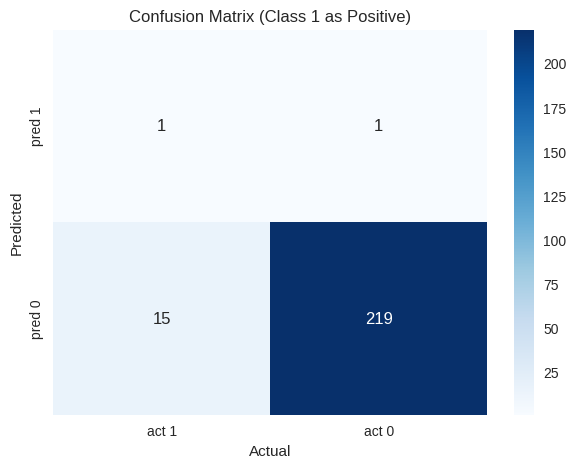

None


,0,1,accuracy,macro avg,weighted avg
precision,0.935897,0.500000,0.932203,0.717949,0.906345
recall,0.995455,0.062500,0.932203,0.528977,0.932203
f1-score,0.964758,0.111111,0.932203,0.537934,0.906883
support,220.000000,16.000000,0.932203,236.000000,236.000000


In [ ]:
## 최종 혼동 행렬 및 분류 보고서 출력
print(custom_confusion_matrix(y_test, pred_best['prediction_label']))

report = classification_report(y_test, pred_best['prediction_label'], digits = 4,  output_dict=True)
pd.DataFrame(report)

## TPOT(Tree-based Pipeline Optimization Tool)

In [ ]:
## tpot 설치
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.9 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=7c850cd1e688f21a8784f9219a8c6b00ce201fadc4d9b8a4a1ea6b8d913617ad
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier

###  TPOT

- 유전알고리즘 사용하여 최적의 머신러닝 파이프라인을 자동으로 탐색..

In [ ]:
## TPOTClassifier 설정
tpot = TPOTClassifier(
                                    generations = 5,          # 탐색할 세대 수, 세대 수가 많을수록 더 많은 모델, 하이퍼파라 탐색
                                    population_size = 20,     # 각 세대의 파이프라인 수
                                    offspring_size = 10,      # 각 세대의 자식 개수
                                    mutation_rate = 0.9,      # 돌연변이 비율
                                    crossover_rate = 0.1,     # 교차율
                                    scoring = 'accuracy',     # 최적화할 평가지표, 'f1', 'roc_auc', /'r2', 'neg_mean_squared_error',
                                    cv = 3,                   # 5-폴드 교차 검증
                                    subsample = 1.0,          # 데이터 샘플링 비율
                                    n_jobs = -1,              # 전체 CPU 코어 사용
                                    max_time_mins = 1,       # 최대 탐색 시간(분)
                                    random_state = 1234,        # 난수 시드 설정
                                    verbosity = 2             # 출력 정보 수준
)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/20 [00:00<?, ?pipeline/s]


1.24 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, criterion=entropy, max_features=0.55, min_samples_leaf=3, min_samples_split=17, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=3,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=None, max_eval_time_mins=5, max_time_mins=1,
               memory=None, mutation_rate=0.9, n_jobs=-1, offspring_size=10,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=1234, scoring='accuracy', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [ ]:
tpot

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=3,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=None, max_eval_time_mins=5, max_time_mins=1,
               memory=None, mutation_rate=0.9, n_jobs=-1, offspring_size=10,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=1234, scoring='accuracy', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [ ]:
##  TPOT이 찾은 최적의 파이프라인 객체를 출력
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(accept_sparse=False,
                                                                     check_inverse=True,
                                                                     feature_names_out=None,
                                                                     func=<function copy at 0x7c1703f51990>,
                                                                     inv_kw_args=None,
                                                                     inverse_func=None,
                                                                     kw_args=None,
                                                                     validate=False)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(accept_spa...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='entropy',
                                      max_depth=None, max_features=0.55,
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=3, min_samples_split=17,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=None, oob_score=False,
                                      random_state=1234, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [ ]:
## 테스트 결과
tpot.score(X_test, y_test) # accuracy

1.0

[[ 16   0]
 [  0 220]]


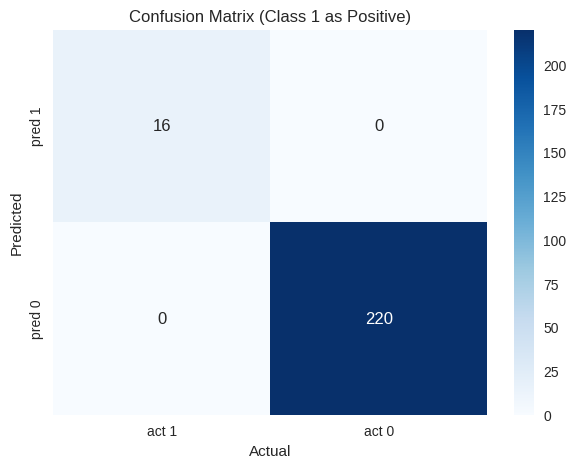

None


,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,220.0,16.0,1.0,236.0,236.0


In [ ]:
## 예측 결과
y_pred_tpot = tpot.predict(X_test)

## 최종 혼동 행렬 및 분류 보고서 출력
print(custom_confusion_matrix(y_test, y_pred_tpot))

report = classification_report(y_test, y_pred_tpot, digits = 4,  output_dict=True)
pd.DataFrame(report)


In [ ]:
## 최적의 파이프라인 코드 출력
# tpot.export('./best_pipeline.py')  # 최적의 파이프라인을 파이썬 코드로 저장

### 특정 모델 지정하기

In [ ]:
## 사용자 정의 구성 딕셔너리 설정
custom_config = {
    'sklearn.ensemble.RandomForestClassifier': {  # 랜덤 포레스트
        'n_estimators': [100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_split': [2, 5, 10]
    },
    'sklearn.ensemble.GradientBoostingClassifier': {  # GBM
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'sklearn.linear_model.LogisticRegression': {  # 로지스틱 회귀
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['liblinear']
    },
    'sklearn.tree.DecisionTreeClassifier': {  # 의사결정나무
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
}

In [ ]:
## TPOTClassifier 설정 (엄청 오래 걸림..10분이상..)
tpot = TPOTClassifier(
                                  generations = 5,
                                  population_size = 20,
                                  config_dict = custom_config,  # 사용자 정의 구성 설정
                                  scoring = 'f1',                                   # 최적화할 평가지표
                                  cv = 3,
                                  random_state = 123,
                                  verbosity = 2                                   # 1->3, 3으로 갈수록 출력이 많아짐
)

# 모델 학습
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: DecisionTreeClassifier(RandomForestClassifier(input_matrix, max_features=sqrt, min_samples_split=10, n_estimators=200), criterion=entropy, max_depth=30, min_samples_split=2)


TPOTClassifier(config_dict={'sklearn.ensemble.GradientBoostingClassifier': {'learning_rate': [0.01,
                                                                                              0.1,
                                                                                              0.2],
                                                                            'max_depth': [3,
                                                                                          5,
                                                                                          7],
                                                                            'n_estimators': [100,
                                                                                             200]},
                            'sklearn.ensemble.RandomForestClassifier': {'max_features': ['auto',
                                                                                         'sqrt',
                                                                                         'log2'],
                                                                        'min_samples_split': [2,
                                                                                              5,
                                                                                              10],
                                                                        'n_estimators': [100,
                                                                                         200]},
                            'sklearn.linear_model.LogisticRegression': {'C': [0.01,
                                                                              0.1,
                                                                              1.0,
                                                                              1...
                                                                                          10]}},
               crossover_rate=0.1, cv=3, disable_update_check=False,
               early_stop=None, generations=5, log_file=None,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=123, scoring='f1', subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
# EOS